In [5]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from networkx import nx
from networkx.algorithms import tree
import sys
from random import randint

INF = 999999
os.chdir('..')  #volta um diretorio de getcwd

# Grafo de entrada
Visualização do grafo.

Os testes foram feitos baseados em 2 tipos de grafos, grafo completo portanto com quantidade máxima de arcos, e grafo com um ciclo, com quantidade mínima de arcos, para cada um deles foi gerado 3 grafos, com 10, 100 e 1000 nós, para comparação dos resultados.

Como exemplo será mostrado apenas os grafos de 10 nós, pois os demais são muito grandes e dificulta a visualização.

In [6]:
# Arquivo deve ter nós inteiros sequenciais começando de 1, o peso pode ser ponto flutuante
path = os.getcwd() + "\\Arquivos\\G1W.txt"  
cig10 = pd.read_csv(path, header=None, sep=" ", names = ["n1", "n2", "weight"], dtype = {'n1':int ,'n2':int ,'weight':int})
cog10 = pd.read_csv(path, header=None, sep=" ", names = ["n1", "n2", "weight"], dtype = {'n1':int ,'n2':int ,'weight':int})

Grafo ciclo

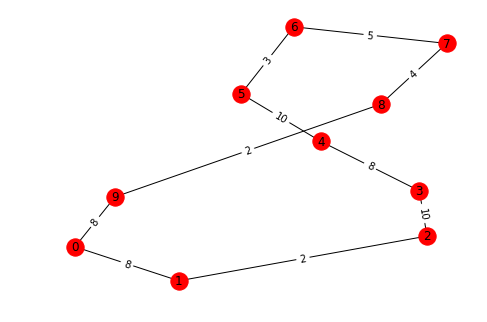

In [7]:
cig10 = pd.read_csv(os.getcwd() + "\\Arquivos\\cig10.txt" , header=None, sep=" ", names = ["n1", "n2", "weight"], dtype = {'n1':int ,'n2':int ,'weight':int})
nodes = pd.unique(cig10[['n1', 'n2']].values.ravel('K'))
n_arcs = cig10.shape[0]
n_nodes = max(cig10['n1'].max(),cig10['n2'].max())
cig10.head()

Gcig10=nx.from_pandas_edgelist(cig10, 'n1', 'n2', 'weight')
if not nx.is_connected(Gcig10):
    sys.exit('Grafo deve ser conexo')

pos = nx.spring_layout(Gcig10)
nx.draw(Gcig10, pos = pos,with_labels = True)
nx.draw_networkx_edge_labels(Gcig10, pos = pos,edge_labels=nx.get_edge_attributes(Gcig10,'weight'))
plt.show()

Grafo completo

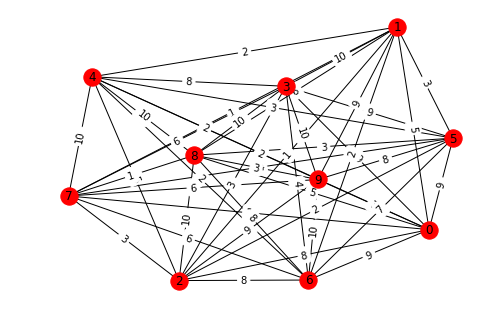

In [8]:
cog10 = pd.read_csv(os.getcwd() + "\\Arquivos\\cog10.txt" , header=None, sep=" ", names = ["n1", "n2", "weight"], dtype = {'n1':int ,'n2':int ,'weight':int})
nodes = pd.unique(cog10[['n1', 'n2']].values.ravel('K'))
n_arcs = cog10.shape[0]
n_nodes = max(cog10['n1'].max(),cog10['n2'].max())
cog10.head()

Gcog10=nx.from_pandas_edgelist(cog10, 'n1', 'n2', 'weight')
if not nx.is_connected(Gcog10):
    sys.exit('Grafo deve ser conexo')

pos = nx.spring_layout(Gcog10)
nx.draw(Gcog10, pos = pos,with_labels = True)
nx.draw_networkx_edge_labels(Gcog10, pos = pos,edge_labels=nx.get_edge_attributes(Gcog10,'weight'))
plt.show()

# Prim
Aplicando o algoritmo de Prim

In [9]:
#Função que retorna o indice de menor peso
def minWeight(key, mst, n_nodes):
    #for idx,node in enumerate(mst):
    minWeight = INF
    minIndex = None
    for i in range(n_nodes):
        if key[i] < minWeight and mst[i] == None:
            minWeight = key[i]
            minIndex = i
    return minIndex

In [10]:
def primGraph(pi,G):
    n_nodes = len(G)
    primData = pd.DataFrame(columns=['n1', 'n2', 'weight'])
    j=0;
    for i in range(n_nodes):
        if pi[i] != None:
            #try eh pra verificar n1-n2 ou n2-n1
            try:
                w = G[pi[i]][i]['weight']
            except KeyError:
                w = G[i][pi[i]]['weight']
            #primData.loc[j] = [pi[i], nodes[i], G[nodes[i]][nodes[pi[i]]]['weight']]
            primData.loc[j] = [pi[i], i, w] #i = node
            j = j+1
    
    Gp = nx.from_pandas_edgelist(primData, 'n1', 'n2', 'weight')
    if not nx.is_connected(Gp):
        sys.exit('Grafo deveria ser conexo')
    pos = nx.spring_layout(Gp)
    nx.draw(Gp, pos = pos,with_labels = True)
    nx.draw_networkx_edge_labels(Gp, pos = pos,edge_labels=nx.get_edge_attributes(Gp,'weight'))
    plt.show()
    return primData

In [11]:
def prim(node,G):
    n_nodes = len(G)
    key = np.full((n_nodes),INF)
    pi = np.full((n_nodes),None)
    mst = np.full((n_nodes), None)

    #prim
    #key[np.where(nodes == node)[0][0]] = 0 #inicial node
    key[node-1] = 0 #initial node
    
    for it in range(n_nodes):
        u_idx = minWeight(key, mst, n_nodes) #node index of min weght
        mst[u_idx] = True
        
        for i in G.neighbors(u_idx): #u_idx = noh u
            try:
                w = G[int(u_idx)][i]['weight'] #it = o noh referente ao indice it
            except KeyError:
                w = G[i][int(u_idx)]['weight'] #it = o noh referente ao indice it
                
            if w>0 and mst[int(i)] == None and key[int(i)] >w:  #i = indice do noh i
                #se o peso for maior que zero, se o noh nao tiver sido visitado ainda, e o peso desse eh maior que o outro
                key[int(i)] = w
                pi[int(i)] = u_idx

    
    return pi, np.sum(key)
    

# Resultados

Será comparado os cenários para 10, 100 e 1000 nós

### Com 10 nós

#### Grafo completo

Wall time: 0 ns


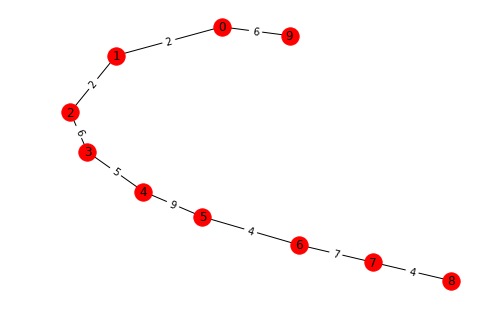

In [129]:
%time pi, cost = prim(3,Gcig10)
a = primGraph(pi,Gcig10)

#### Grafo com um ciclo

Wall time: 0 ns


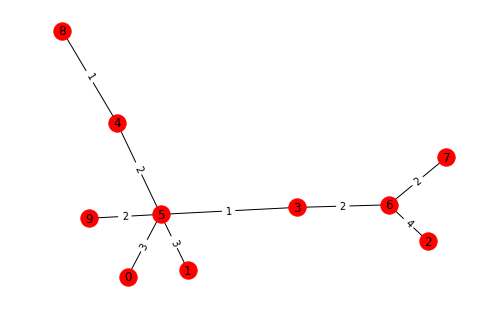

In [128]:
%time pi, cost = prim(3,Gcog10)
a = primGraph(pi,Gcog10)

### Com 100 nós

#### Grafo completo

In [124]:
cog100 = pd.read_csv(os.getcwd() + "\\Arquivos\\cog100.txt" , header=None, sep=" ", names = ["n1", "n2", "weight"], dtype = {'n1':int ,'n2':int ,'weight':int})
nodes = pd.unique(cog100[['n1', 'n2']].values.ravel('K'))

Gcog100=nx.from_pandas_edgelist(cog100, 'n1', 'n2', 'weight')
if not nx.is_connected(Gcog100):
    sys.exit('Grafo deve ser conexo')

%time pi, cost = prim(3,Gcog100)

Wall time: 45.8 ms


#### Grafo com um ciclo

In [125]:
cig100 = pd.read_csv(os.getcwd() + "\\Arquivos\\cig100.txt" , header=None, sep=" ", names = ["n1", "n2", "weight"], dtype = {'n1':int ,'n2':int ,'weight':int})
nodes = pd.unique(cig100[['n1', 'n2']].values.ravel('K'))

Gcig100=nx.from_pandas_edgelist(cig100, 'n1', 'n2', 'weight')
if not nx.is_connected(Gcig100):
    sys.exit('Grafo deve ser conexo')

%time pi, cost = prim(3,Gcig100)

Wall time: 3.99 ms


### Com 1000 nós

#### Grafo completo

In [120]:
cog1000 = pd.read_csv(os.getcwd() + "\\Arquivos\\cog1000.txt" , header=None, sep=" ", names = ["n1", "n2", "weight"], dtype = {'n1':int ,'n2':int ,'weight':int})
nodes = pd.unique(cog1000[['n1', 'n2']].values.ravel('K'))

Gcog1000=nx.from_pandas_edgelist(cog1000, 'n1', 'n2', 'weight')
if not nx.is_connected(Gcog1000):
    sys.exit('Grafo deve ser conexo')

%time pi, cost = prim(3,Gcog1000)

Wall time: 4.45 s


#### Grafo com um ciclo

In [119]:
cig1000 = pd.read_csv(os.getcwd() + "\\Arquivos\\cig1000.txt" , header=None, sep=" ", names = ["n1", "n2", "weight"], dtype = {'n1':int ,'n2':int ,'weight':int})
nodes = pd.unique(cig1000[['n1', 'n2']].values.ravel('K'))

Gcig1000=nx.from_pandas_edgelist(cig1000, 'n1', 'n2', 'weight')
if not nx.is_connected(Gcig1000):
    sys.exit('Grafo deve ser conexo')

%time pi, cost = prim(3,Gcig1000)

Wall time: 308 ms


# Comparando com solução já existente

In [12]:
files = ['cig10.txt', 'cig50.txt', 'cig100.txt', 'cig500.txt', 'cig1000.txt', 'cig5000.txt', 'cig10000.txt',
         'cog10.txt', 'cog50.txt', 'cog100.txt', 'cog500.txt', 'cog1000.txt', 'cog5000.txt', 'cog10000.txt']

In [13]:
for file in files:
    data = pd.read_csv(os.getcwd() + "\\Arquivos\\"+file , header=None, sep=" ", names = ["n1", "n2", "weight"], dtype = {'n1':int ,'n2':int ,'weight':int})
    nodes = pd.unique(data[['n1', 'n2']].values.ravel('K'))

    G=nx.from_pandas_edgelist(data, 'n1', 'n2', 'weight')
    if not nx.is_connected(G):
        sys.exit('Grafo deve ser conexo')
    print(file)
    %time pi, cost = prim(3,G)

cig10.txt
Wall time: 0 ns
cig50.txt
Wall time: 3.99 ms
cig100.txt
Wall time: 2.99 ms
cig500.txt
Wall time: 148 ms
cig1000.txt
Wall time: 234 ms
cig5000.txt
Wall time: 6.14 s
cig10000.txt
Wall time: 30.5 s
cog10.txt
Wall time: 0 ns
cog50.txt
Wall time: 31.2 ms
cog100.txt
Wall time: 53.1 ms
cog500.txt
Wall time: 865 ms
cog1000.txt
Wall time: 3.61 s
cog5000.txt


KeyboardInterrupt: 

KeyboardInterrupt: 

In [121]:
%%time
mst = tree.minimum_spanning_edges(Gcog1000, algorithm='prim', data=False)


Wall time: 0 ns


#### Tentar uma comparação mais igualitária, com os mesmo retornos das funções.

# Somente gerando os grafos, não será utilizado na versão final do trabalho

In [131]:
%%time
#grafo ciclo, e grafo completo. Por conta da quantidaed de nós e arcos
n_range = [10, 50, 100, 500, 1000, 5000, 10000, 50000, 100000, 500000, 1000000]
#n_range = [50,500,5000,10000]
#n_range = [50000, 100000, 500000, 1000000]
    
for n in n_range:
    f= open("cig"+str(n)+".txt","w+")
    cig = nx.cycle_graph(n)
    for e in cig.edges():
        n1 = e[0]
        n2 = e[1]
        w = randint(1,n)
        cig[n1][n2]['weight'] = w
        line = str(n1)+' '+str(n2)+' '+str(w)+'\n'
        f.write(line)
    f.close()

    f= open("cog"+str(n)+".txt","w+")
    cog = nx.complete_graph(n)
    for e in cog.edges():
        n1 = e[0]
        n2 = e[1]
        w = randint(1,n)
        cog[n1][n2]['weight'] = w
        line = str(n1)+' '+str(n2)+' '+str(w)+'\n'
        f.write(line)
    f.close()

MemoryError: 

In [91]:
len(Gcig10)

10

In [ ]:
#Função que retorna o indice de menor peso
def minWeight(key, mst):
    #for idx,node in enumerate(mst):
    minWeight = INF
    minIndex = None
    for i in range(n_nodes):
        if key[i] < minWeight and mst[i] == None:
            minWeight = key[i]
            minIndex = i
    return minIndex

def primGraph(pi,G):
    primData = pd.DataFrame(columns=['n1', 'n2', 'weight'])
    j=0;
    for i in range(n_nodes):
        if pi[i] != None:
            #try eh pra verificar n1-n2 ou n2-n1
            try:
                w = G[pi[i]][i+1]['weight']
            except KeyError:
                w = G[i+1][pi[i]]['weight']
            #primData.loc[j] = [pi[i], nodes[i], G[nodes[i]][nodes[pi[i]]]['weight']]
            primData.loc[j] = [pi[i], i+1, w] #i+1 = node
            j = j+1
    
    Gp = nx.from_pandas_edgelist(primData, 'n1', 'n2', 'weight')
    if not nx.is_connected(Gp):
        sys.exit('Grafo deveria ser conexo')
    pos = nx.spring_layout(Gp)
    nx.draw(Gp, pos = pos,with_labels = True)
    nx.draw_networkx_edge_labels(Gp, pos = pos,edge_labels=nx.get_edge_attributes(Gp,'weight'))
    plt.show()
    return primData

def prim(node,G):
    key = np.full((n_nodes),INF)
    pi = np.full((n_nodes),None)
    mst = np.full((n_nodes), None)
    
    #prim
    #key[np.where(nodes == node)[0][0]] = 0 #inicial node
    key[node-1] = 0 #initial node
    
    for it in range(n_nodes):
        u_idx = minWeight(key, mst) #node index of min weght
        mst[u_idx] = True
        
        for i in G.neighbors(u_idx+1): #u_idx+1 = noh u
            try:
                w = G[int(u_idx+1)][i]['weight'] #it+1 = o noh referente ao indice it
            except KeyError:
                w = G[i][int(u_idx+1)]['weight'] #it+1 = o noh referente ao indice it
                
            if w>0 and mst[int(i-1)] == None and key[int(i-1)] >w:  #i-1 = indice do noh i
                #se o peso for maior que zero, se o noh nao tiver sido visitado ainda, e o peso desse eh maior que o outro
                key[int(i-1)] = w
                pi[int(i-1)] = u_idx+1

    
    return pi, np.sum(key)
    